(start:basicsFitting)=
# The *R* Squared Value of a Fit

## Lesson overview

It is important to quantify how "well" a fitted mathematical function matches a data set. One commonly used 
metric is called the "coefficient of determination" or the "R squared" value (often denoted as *R*<sup>2</sup>). In 
this lesson, we will show how to calculate *R*<sup>2</sup> when fitting data. Our focus will be on the 
practical implementation of *R*<sup>2</sup> using Python, and will skip on the theory behind the value. A good source 
on the basics of *R*<sup>2</sup> can be found [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).

## Topics taught / reviewed

* Calculating the *R*<sup>2</sup> of a fit.
* Determining the mean of an array using the `numpy.mean()` function.
* Finding the sum of an array using the `numpy.sum()` function.

## Calculating *R* squared

To demonstrate how to calculate *R*<sup>2</sup>, let's revisit our Ohm's law fitting example from an
[earlier lesson](link:lineFit). The compiled code block that loads the 
{download}`raw data<./example_data/IV_data_no_uncertainty.csv>`, fits the data, plots both the raw data and fitted 
line, and prints out the fitting results to the shell is shown below:

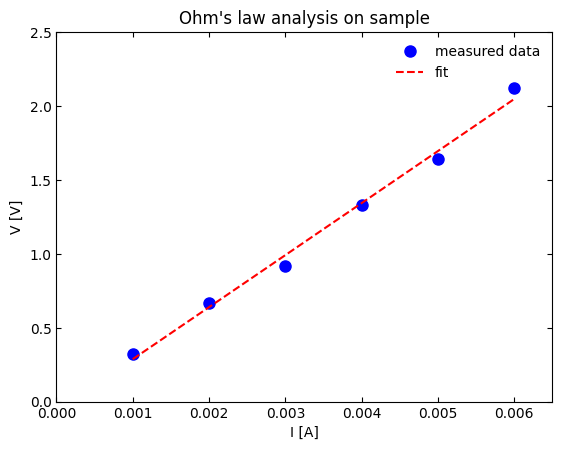

intercept = -0.065 V
intercept std. error = 0.058 V
slope = 352.0 ohm
slope std. error = 14.9 ohm


In [1]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# Create function to fit
def linearFunc(x, intercept, slope):
    y = intercept + slope * x
    return y

# Load data and separate columns
data1 = np.loadtxt("./example_data/IV_data_no_uncertainty.csv", delimiter = ",", skiprows = 2)

current = data1[:, 0]
voltage = data1[:, 1]

# Perform the least-squares fitting
popt, pcov = curve_fit(linearFunc, current, voltage)

# Extract out the fitted parameters and standard errors
intercept = popt[0]
slope = popt[1]
intercept_err = np.sqrt(pcov[0][0])
slope_err = np.sqrt(pcov[1][1])

# Create figure
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# Plot measured data
ax.plot(current, voltage,
        label="measured data",
        marker="o",
        markersize=8,
        linestyle="none",
        color="blue")

# Create fitted line
yfit = intercept + slope * current

# Plot fit data
ax.plot(current, yfit, 
        color="red",
        label="fit",
        linestyle="dashed")

# Figure options
ax.set_title("Ohm's law analysis on sample")
ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")
ax.tick_params(axis="both", direction="in")
ax.tick_params(top="on")
ax.tick_params(right="on")
ax.set_xlim(left = 0, right = 6.5E-3)
ax.set_ylim(bottom = 0, top = 2.5)
ax.legend(frameon=False)

# Show plot
plt.show()

# Report values to shell
print(f"intercept = {intercept:.3f} V")
print(f"intercept std. error = {intercept_err:.3f} V")
print(f"slope = {slope:.1f} ohm")
print(f"slope std. error = {slope_err:.1f} ohm")

Mathematically, the *R*<sup>2</sup> of a fitting is,

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

where $SS_{res}$ is called the "residual sum of squares" and $SS_{tot}$ is called the "total sum of squares". Let's 
first focus on the total sum of squares, $SS_{tot}$, which is,

$$
SS_{tot} = \sum_{i}^n (y_i - \bar{y})^2
$$

where $y_i$ is the $i$-th dependent variable in a data set of size $n$ (in our case these are the individual voltage 
values), and $\bar{y}$ value is the average of all $y_i$ values. We can define $\bar{y}$ as,

$$
\bar{y} = \frac{1}{n} \sum_{i}^n y_i
$$

In our example, the voltage values are the $y_i$ terms. Since these voltages are stored in the array `voltage`, let's 
use the NumPy function [`numpy.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to calculate 
the average voltage and store it in the variable `voltage_mean`. This function calculates the average of an entire 
array or along specified axes. Our array `voltage` is a one-dimensional array, so we will use the default option to 
have `numpy.mean()` calculate the average from all values in the array. The code below demonstrates how to do this.

In [2]:
voltage_mean = np.mean(voltage)
print(f"voltage_mean: {voltage_mean:.3f} V")

voltage_mean: 1.167 V


Now let's calculate $SS_{tot}$. The code block below shows how to do this by first creating an intermediate array 
called `deviation_squared` that stores the square of the deviation between the voltage values and the average 
voltage. Then we use another useful NumPy function, 
[`numpy.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html), to sum all the values in 
`deviation_squared` (also an array). Similar to `numpy.mean()`, we can have `numpy.sum()` sum up along particular 
axes of an array, but for our needs we need to sum up all values.

In [3]:
deviation_squared = (voltage - voltage_mean)**2
ss_tot = np.sum(deviation_squared)
print(f"ss_tot: {ss_tot:.3f} V^2")

ss_tot: 2.184 V^2


Now let's define and calculate $SS_{res}$ (i.e., the other term we need in order to calculate *R*<sup>2</sup>). 
Mathematically, $SS_{res}$ is defined as,

$$
SS_{res} = \sum_{i}^n(y_i - f_i)^2
$$

where $f_i$ represents the calculated $i$-th dependent variable based on the fitting equation. For our situation, 
this is our `yfit` array in the main code block, which we use to create the fit line in the figure. 

```{admonition} Hey! Listen!
:class: tip
The deviation between the actual data and model data (i.e., $y_i - f_i$) is sometimes referred to as the 
"residual" or "error". The phrase "error" can be applied to any situation where you are comparing a value to 
a reference value. Therefore you may see $SS_{res}$ equation rewritten in the form,
 
$$
SS_{res} = \sum_{i}^n(y_i - f_i)^2 = \sum_{i}^n e_i^2
$$
 
where $e$ is the "error" between the measured value and the estimated value from a fit.
```

Let's go ahead and calculate $SS_{res}$ for our example,

In [4]:
error_squared = (voltage - yfit)**2
ss_res = np.sum(error_squared)
print(f"ss_res: {ss_res:.3f} V^2")

ss_res: 0.016 V^2


We again use an intermediate variable, this time called `error_squared`, that stores the deviation between the 
measured voltages and the modeled voltage values from `yfit`. We then use the `numpy.sum()` function to sum up all 
the values in this array to get $SS_{res}$. 

With these two values, we can now calculate *R*<sup>2</sup>:

In [5]:
r_squared = 1 - ss_res / ss_tot
print(f"R squared: {r_squared:.4f}")

R squared: 0.9929


For reference, the code below combines all of these steps together into one single code block.

In [6]:
# Calculate voltage mean
voltage_mean = np.mean(voltage)
print(f"voltage_mean: {voltage_mean:.3f} V")

# Calculate total sum of squares, ss_tot
deviation_squared = (voltage - voltage_mean)**2
ss_tot = np.sum(deviation_squared)
print(f"ss_tot: {ss_tot:.3f} V^2")

# Calculate residual sum of squares, ss_res
error_squared = (voltage - yfit)**2
ss_res = np.sum(error_squared)
print(f"ss_res: {ss_res:.3f} V^2")

# Calculate R squared
r_squared = 1 - ss_res / ss_tot
print(f"R squared: {r_squared:.4f}")

voltage_mean: 1.167 V
ss_tot: 2.184 V^2
ss_res: 0.016 V^2
R squared: 0.9929


## Conclusion

With a few simple lines of code, we now have a metric that assesses the overall quality of a fit. Since we 
already are using the NumPy library, we do not need to introduce any additional libraries into our current 
fitting codes. The setup is generic, and therefore can be implemented to non-linear curve fitting as well. While this 
lesson goes over the how to calculate *R*<sup>2</sup> in Python, this lesson does not cover the meaning of the number 
or its significance to the quality of a fit. Again, a good review about *R*<sup>2</sup> can be found
[here](https://en.wikipedia.org/wiki/Coefficient_of_determination). The *R*<sup>2</sup> metric is one of many ways to 
determine the overall quality of a fit, with each metric having its own advantages and disadvantages. Hopefully this 
lesson encourages you to explore and implement fitting metrics for your fitting needs.

## Want to learn more?

[Wikipedia - Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)  
[NumPy - The numpy.mean() Function](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)  
[NumPy - The numpy.sum() Function](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)